# <p style="background-color:#4d91ff;font-family:newtimeroman;color:#FFF9ED;font-size:140%;text-align:center;border-radius:10px 10px;">Importing required libraries</p>

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/transactional-retail-dataset-of-electronics-store/warehouses.csv
/kaggle/input/transactional-retail-dataset-of-electronics-store/dirty_data.csv
/kaggle/input/transactional-retail-dataset-of-electronics-store/missing_data.csv


In [2]:
# assigning path of dirty_data.csv to variable dirty_data_path
dirty_data_path = '/kaggle/input/transactional-retail-dataset-of-electronics-store/dirty_data.csv'

# assigning path of missing_data.csv to variable missing_data_path
missing_data_path = '/kaggle/input/transactional-retail-dataset-of-electronics-store/missing_data.csv'

# assigning path of warehouses.csv to variable warehouses_path
warehouses_path = '/kaggle/input/transactional-retail-dataset-of-electronics-store/warehouses.csv'

# <p style="background-color:#4d91ff;font-family:newtimeroman;color:#FFF9ED;font-size:140%;text-align:center;border-radius:10px 10px;">Reading csv file</p>

In [3]:
dirty_data = pd.read_csv(dirty_data_path)

In [4]:
# display top 5 rows
dirty_data.head()  

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


# <p style="background-color:#4d91ff;font-family:newtimeroman;color:#FFF9ED;font-size:140%;text-align:center;border-radius:10px 10px;">Displaying statistical info of dirty_data</p>

In [5]:
dirty_data.describe() 

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000
mean,25522.216000,76.658200,-35.835234,144.969494,10.890000,3.920967e+04,2.204224
std,86333.729169,14.481465,12.045393,0.022720,8.649134,2.741940e+05,8.812416
min,585.000000,46.350000,-37.827123,144.924967,0.000000,6.392900e+02,0.107800
25%,7050.000000,65.982500,-37.818222,144.953488,5.000000,6.454735e+03,0.751425
50%,12807.500000,76.310000,-37.812165,144.965357,10.000000,1.129396e+04,1.030100
75%,20360.000000,82.555000,-37.805364,144.983985,15.000000,1.811919e+04,1.408625
max,947691.000000,114.040000,37.826339,145.019837,25.000000,5.688270e+06,94.973400


In [6]:
print(f'Shape of dirty_data is: {dirty_data.shape}')

Shape of dirty_data is: (500, 16)


# <p style="background-color:#4d91ff;font-family:newtimeroman;color:#FFF9ED;font-size:140%;text-align:center;border-radius:10px 10px;">Whether any columns contains null value or not</p>

In [7]:
print(dirty_data.isnull().sum())

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           0
is_happy_customer                0
dtype: int64


**So no column contain null value**

# <p style="background-color:#4d91ff;font-family:newtimeroman;color:#FFF9ED;font-size:140%;text-align:center;border-radius:10px 10px;">Analyzing datatype of each column</p>

In [8]:
print(dirty_data.dtypes)

order_id                          object
customer_id                       object
date                              object
nearest_warehouse                 object
shopping_cart                     object
order_price                        int64
delivery_charges                 float64
customer_lat                     float64
customer_long                    float64
coupon_discount                    int64
order_total                      float64
season                            object
is_expedited_delivery               bool
distance_to_nearest_warehouse    float64
latest_customer_review            object
is_happy_customer                   bool
dtype: object


### **Data type of date column is object instead of datetime, So fixing this problem**

In [9]:
dirty_data.date = pd.to_datetime(dirty_data['date'])

In [10]:
print(dirty_data.date.dtypes)      

datetime64[ns]


In [11]:
print(dirty_data.dtypes)  # Now data in date column is in datetime64 form

order_id                                 object
customer_id                              object
date                             datetime64[ns]
nearest_warehouse                        object
shopping_cart                            object
order_price                               int64
delivery_charges                        float64
customer_lat                            float64
customer_long                           float64
coupon_discount                           int64
order_total                             float64
season                                   object
is_expedited_delivery                      bool
distance_to_nearest_warehouse           float64
latest_customer_review                   object
is_happy_customer                          bool
dtype: object


# <p style="background-color:#4d91ff;font-family:newtimeroman;color:#FFF9ED;font-size:140%;text-align:center;border-radius:10px 10px;">Analyzing order_id</p>

### **Checking whether order_id is unique or not**

In [12]:
if dirty_data.order_id.is_unique:    
    print("Data in order_id is unique")      # execute when 'if' block will true
else:
    print("Data in order_id is not unique")  # execute when 'else' block will true

Data in order_id is unique


# <p style="background-color:#4d91ff;font-family:newtimeroman;color:#FFF9ED;font-size:140%;text-align:center;border-radius:10px 10px;">Analyzing nearest_warehouse</p>

### **Unique item in nearest_warehouse**

In [13]:
dirty_data['nearest_warehouse'].unique()

array(['Thompson', 'Nickolson', 'Bakers', 'nickolson', 'thompson'],
      dtype=object)

### **Thompson and thompson are same but here they both are different so make it same**

### **Similarly Nickolson and nickolson are same**

## **To solve this problem, convert data in nearest_warehouse in title case**

In [14]:
dirty_data.nearest_warehouse = dirty_data.nearest_warehouse.str.title()

In [15]:
dirty_data['nearest_warehouse'].unique()

array(['Thompson', 'Nickolson', 'Bakers'], dtype=object)

**Now this problem is solved**

# <p style="background-color:#4d91ff;font-family:newtimeroman;color:#FFF9ED;font-size:140%;text-align:center;border-radius:10px 10px;">Checking quantities of near_warehouse</p>

In [16]:
warehouses = dirty_data['nearest_warehouse'].value_counts()
print(warehouses)

Thompson     197
Nickolson    184
Bakers       119
Name: nearest_warehouse, dtype: int64


# <p style="background-color:#4d91ff;font-family:newtimeroman;color:#FFF9ED;font-size:130%;text-align:center;border-radius:10px 10px;">Visualizing data using bar chart</p>

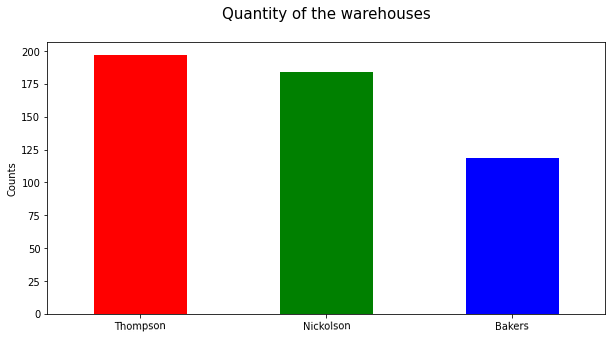

In [17]:
warehouses.plot(kind='bar', rot=1, color=['r','g','b'], figsize=(10,5))
plt.title("Quantity of the warehouses\n", size=15)
plt.ylabel("Counts");

# <p style="background-color:#4d91ff;font-family:newtimeroman;color:#FFF9ED;font-size:130%;text-align:center;border-radius:10px 10px;">Visualizing data using pie chart</p>

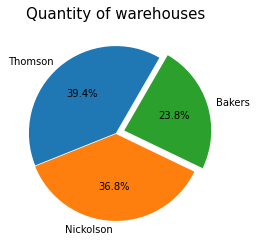

In [18]:
plt.pie(warehouses,
        labels=['Thomson',"Nickolson",'Bakers'],
        autopct="%0.1f%%",
        explode=[0,.01,0.1],
        startangle=60,radius=1)
plt.title("Quantity of warehouses", size=15)
plt.show()

### **It seems that Thomson is nearest warehouse accessible to mostly customer**

### **Analyzing order_price and order_total**
- order_price: Price before any discounts and delivery charges
- order_total: Price after all discounts and/or delivery charges are applied

# <p style="background-color:#4d91ff;font-family:newtimeroman;color:#FFF9ED;font-size:140%;text-align:center;border-radius:10px 10px;">Displaying Record whose order price is maximum</p>

In [19]:
dirty_data[dirty_data.order_price == dirty_data.order_price.max()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
335,ORD116440,ID0332546017,2019-12-31,Thompson,"[('Lucent 330S', 1), ('iAssist Line', 1), ('Ca...",947691,90.82,-37.809368,144.949342,10,9266.32,Summer,True,0.4187,work fine great product and no issues.,True


# <p style="background-color:#4d91ff;font-family:newtimeroman;color:#FFF9ED;font-size:140%;text-align:center;border-radius:10px 10px;">Displaying Record whose order price is minimum</p>

In [20]:
dirty_data[dirty_data.order_price == dirty_data.order_price.min()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
308,ORD165713,ID2384157684,2019-11-23,Bakers,"[('iStream', 2), ('Candle Inferno', 1)]",585,91.79,-37.800798,145.005428,25,639.29,Spring,True,1.361,junk had this thing for less than 2 months. ha...,False


## **Now checking whether the order_total(after all discount and delivery charges are applied) is correct or there is some problem in it**

In [21]:
dirty_data.loc[:,['order_price','delivery_charges','coupon_discount','order_total']].head(10)

,order_price,delivery_charges,coupon_discount,order_total
0,12200,79.89,10,11059.89
1,9080,62.71,0,9142.71
2,10670,65.87,10,9668.87
3,24800,57.61,15,21137.61
4,9145,75.54,25,6934.29
5,7810,71.22,10,7100.22
6,13700,74.84,5,13089.84
7,7960,52.28,5,10789.79
8,25390,107.58,10,22958.58
9,13320,62.26,15,11384.26


# <p style="background-color:#4d91ff;font-family:newtimeroman;color:#FFF9ED;font-size:140%;text-align:center;border-radius:10px 10px;">Computing and Displaying order_total price of first 10 records</p>

In [22]:
for i, index in enumerate(range(0,10)):
    if (dirty_data['coupon_discount'][i] != 0):
        dis_price = (dirty_data['order_price'][i]) * (dirty_data['coupon_discount'][i] / 100)   # apply coupon to original price
        price = dis_price + dirty_data['delivery_charges'][i]         # adding delivery charges
        final_price = np.round(dis_price,2)
    
    else:
        final_price = dirty_data['order_price'][i] + dirty_data['delivery_charges'][i]   # adding order_price and delivery_charges
        final_price = np.round(final_price,2)    # round off upto 2nd decimal place

    print(f'Order total of record at index {index} is: {final_price} ')

Order total of record at index 0 is: 1220.0 
Order total of record at index 1 is: 9142.71 
Order total of record at index 2 is: 1067.0 
Order total of record at index 3 is: 3720.0 
Order total of record at index 4 is: 2286.25 
Order total of record at index 5 is: 781.0 
Order total of record at index 6 is: 685.0 
Order total of record at index 7 is: 398.0 
Order total of record at index 8 is: 2539.0 
Order total of record at index 9 is: 1998.0 


### **It looks like that there is an error in order_total feature of dirty_data, So fixing this**

In [23]:
lis = list()     # creating an empty list

# <p style="background-color:#4d91ff;font-family:newtimeroman;color:#FFF9ED;font-size:140%;text-align:center;border-radius:10px 10px;">Computing and appending order_final in 'lis'</p>

In [24]:
for i in range(0,len(dirty_data['order_price'])):
    if (dirty_data['coupon_discount'][i] != 0):
        dis_price = (dirty_data['order_price'][i]) * (dirty_data['coupon_discount'][i] / 100)   # apply coupon to original price
        price = dis_price + dirty_data['delivery_charges'][i]         # adding delivery charges
        final_price = np.round(dis_price,2)
        lis.append(final_price)               # appending final_price to lis
    
    else:
        final_price = dirty_data['order_price'][i] + dirty_data['delivery_charges'][i]   # adding order_price and delivery_charges
        final_price = np.round(final_price,2)    # round off upto 2nd decimal place
        lis.append(final_price)                  # appending final_price to lis


In [25]:
print(f'Items (Price) in list is: {len(lis)}')

Items (Price) in list is: 500


# <p style="background-color:#4d91ff;font-family:newtimeroman;color:#FFF9ED;font-size:140%;text-align:center;border-radius:10px 10px;">Converting list to Series and set it in order_total</p>

In [26]:
dirty_data['order_total'] = pd.Series(lis)

**Now the problem with order_total is solved**

# <p style="background-color:#4d91ff;font-family:newtimeroman;color:#FFF9ED;font-size:140%;text-align:center;border-radius:10px 10px;">Removing outlier</p>

### - **Using IQR**

# <p style="background-color:#4d91ff;font-family:newtimeroman;color:#FFF9ED;font-size:130%;text-align:center;border-radius:10px 10px;">Checking for Outlier in order_total</p>

In [27]:
Q1_order_total = dirty_data['order_total'].quantile(0.25)     # Lower Quartile
Q3_order_total = dirty_data['order_total'].quantile(0.75)     # Upper Quartile

In [28]:
print(f'Lower Quartile is: {Q1_order_total}') 
print(f'Upper Quartile is: {Q3_order_total}')

Lower Quartile is: 860.375
Upper Quartile is: 5020.0


# <p style="background-color:#4d91ff;font-family:newtimeroman;color:#FFF9ED;font-size:130%;text-align:center;border-radius:10px 10px;">Finding IQR</p>

In [29]:
# upper quartile - lower quartile

IQR_order_total = Q3_order_total - Q1_order_total    

In [30]:
print(f'Value of IQR_order_total is: {IQR_order_total}')

Value of IQR_order_total is: 4159.625


# <p style="background-color:#4d91ff;font-family:newtimeroman;color:#FFF9ED;font-size:130%;text-align:center;border-radius:10px 10px;">Finding lower and upper limit</p>

In [31]:
lower_limit_order_total = Q1_order_total - 1.5 * IQR_order_total
upper_limit_order_total = Q3_order_total + 1.5 * IQR_order_total

In [32]:
print(f'Lower limit of order_total is: {lower_limit_order_total}')
print(f'Upper limit of order_total is: {upper_limit_order_total}')

Lower limit of order_total is: -5379.0625
Upper limit of order_total is: 11259.4375


### **Any value less then lower limit and greater then upper limit is outlier**

# <p style="background-color:#4d91ff;font-family:newtimeroman;color:#FFF9ED;font-size:130%;text-align:center;border-radius:10px 10px;">Displaying all outlier values</p>

In [33]:
outlier_dirty_data = dirty_data[(dirty_data['order_total'] < lower_limit_order_total) | (dirty_data['order_total'] > upper_limit_order_total)]

In [34]:
outlier_dirty_data

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
10,ORD034800,ID4283908179,2019-08-03,Bakers,"[('Alcon 10', 2), ('pearTV', 2), ('iStream', 1...",31895,78.25,-37.811334,145.008678,0,31973.25,Winter,True,1.1919,i love this phone it is so user friendly and t...,True
12,ORD124395,ID0702352304,2019-02-11,Thompson,"[('Alcon 10', 1), ('Universe Note', 1), ('pear...",19010,94.75,-37.805433,144.941333,0,19104.75,Summer,True,0.9509,the cult's alive i love this little dummy-phon...,True
13,ORD255642,ID3085953531,2019-12-24,Nickolson,"[('iAssist Line', 2), ('Alcon 10', 1), ('pearT...",19710,75.64,-37.816166,144.975278,0,19785.64,Summer,True,0.5716,phone had a problem phone seemed great but con...,False
14,ORD496722,ID0589449820,2019-04-09,Nickolson,"[('pearTV', 2), ('iStream', 1), ('Lucent 330S'...",31900,79.78,-37.809463,144.972367,0,31979.78,Autumn,True,66.6483,"five stars good speed, like stanley",True
20,ORD178590,ID6167441029,2019-11-20,Thompson,"[('Candle Inferno', 1), ('Toshika 750', 2), ('...",13710,77.61,-37.809311,145.018595,0,13787.61,Spring,False,1.2791,love it. perfect. the battery life is at 94% w...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,ORD033121,ID0777768981,2019-05-17,Thompson,"[('Olivia x460', 1), ('pearTV', 2), ('Universe...",20745,67.67,-37.806155,144.958304,0,20812.67,Autumn,False,1.2259,worth it fantastic worth every penny,True
487,ORD234473,ID0127674021,2019-07-04,Thompson,"[('Candle Inferno', 1), ('Toshika 750', 2), ('...",33870,77.06,-37.802392,144.998158,0,33947.06,Winter,True,0.8848,misses phone calls i love the features. you ge...,True
495,ORD475510,ID0247417082,2019-08-07,Nickolson,"[('Alcon 10', 2), ('iAssist Line', 2)]",386776,59.70,-37.817662,144.970405,10,38677.60,Winter,True,0.1282,i bought this phone to send to my sister in .....,False
496,ORD086060,ID0130015098,2019-03-28,Nickolson,"[('pearTV', 2), ('Candle Inferno', 2), ('Toshi...",22120,62.29,-37.815469,144.968083,0,22182.29,Autumn,True,0.3711,one star it was the wrong phone,False


## **Above records is outlier, So removing it from original data**

In [35]:
print(f'Total outlier records in dirty_data is: {outlier_dirty_data.shape[0]}')

Total outlier records in dirty_data is: 72


### **Any data which is greater than lower limit and less than upper limit is Not an Outlier**

In [36]:
data_without_outlier = dirty_data[(dirty_data['order_total'] > lower_limit_order_total) & (dirty_data['order_total'] < upper_limit_order_total)]

In [37]:
print(f'Total numbers of records without outliers is: {data_without_outlier.shape[0]}')

Total numbers of records without outliers is: 428


# <p style="background-color:#4d91ff;font-family:newtimeroman;color:#FFF9ED;font-size:140%;text-align:center;border-radius:10px 10px;">Displaying top 5 records of data without outliers</p>

In [38]:
data_without_outlier.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,1220.00,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,1067.00,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,3720.00,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,2286.25,Spring,False,0.5867,four stars good,True


# <p style="background-color:#4d91ff;font-family:newtimeroman;color:#FFF9ED;font-size:140%;text-align:center;border-radius:10px 10px;">Analyzing how many customers are happy with sevice</p>

In [39]:
data_without_outlier['is_happy_customer'].unique()

array([ True, False])

In [40]:
satisfaction = data_without_outlier['is_happy_customer'].value_counts()
print(satisfaction)

True     301
False    127
Name: is_happy_customer, dtype: int64


# <p style="background-color:#4d91ff;font-family:newtimeroman;color:#FFF9ED;font-size:140%;text-align:center;border-radius:10px 10px;">Visualizing Data</p>

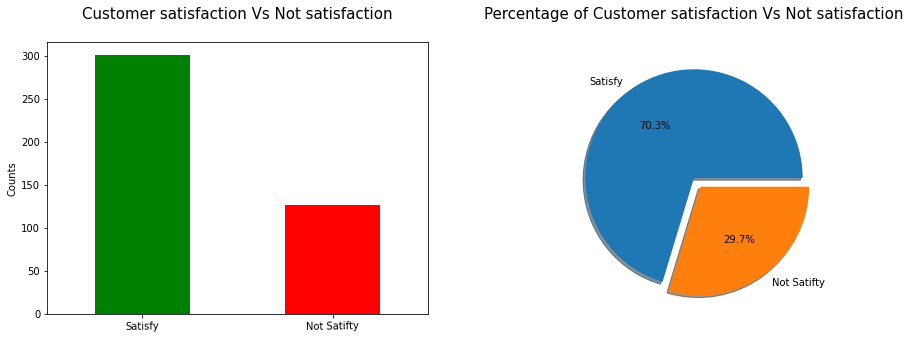

In [41]:
plt.figure(figsize=(15,5))

plt.subplot(121)
satisfaction.plot(kind='bar', color=['g','r'], rot=1)
plt.xticks(range(2), labels=['Satisfy','Not Satifty'])
plt.ylabel('Counts')
plt.title("Customer satisfaction Vs Not satisfaction\n", size=15)


plt.subplot(122)
plt.pie(satisfaction, labels=['Satisfy','Not Satifty'], autopct="%.1f%%",explode=[0,0.1],shadow=True)
plt.title("Percentage of Customer satisfaction Vs Not satisfaction\n", size=15)

plt.show()

## **70.3% customers are satisfy with service**

# <p style="background-color:#4d91ff;font-family:newtimeroman;color:#FFF9ED;font-size:130%;text-align:center;border-radius:10px 10px;">If you find this Notebook helpful, <font size="+3" color="white"><b>Please Upvote.</b></font><br> Thank you 😊
</p>